In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import pandas as pd
import baostock as bs
import script.bsutil as bu
import script.utils as utils
import script.data as data
from script.figure import draw

In [2]:
bs.login()

def get_stock():
    codes = pd.read_csv('stock_list.csv')
    for code in codes['code']:
        yield code
        
def print_information(code):    
    income = data.get_IS(code[3:])
    
    # 连续三年利润，收入增长>20%
    if not np.all(income[['营业总收入', '归属于母公司所有者的净利润']].pct_change(periods=-1).iloc[:3]>0.2):
        return 0
    display(all_stocks[all_stocks['code'] == code])       
    
    change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
    income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)    
    df = income_change[:5].set_index('截止日期')
    display(df)
    
    incomeq = data.get_ISQ(code[3:])
    change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
    incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
    df = incomeq_change[:12].set_index('截止日期')
    display(df)
    
    df = bu.get_price_weekly(code)    
    draw(df, 200, 40, 4, remove_missing=False)
    
    return 1
    
        
stock = get_stock()

# get all stock code
rs = bs.query_stock_basic()
data_list = []
while rs.error_code == '0' and rs.next():
    data_list.append(rs.get_row_data())
all_stocks = pd.DataFrame(data_list, columns=rs.fields)


login success!


code code_name     ipoDate outDate type status
620  sh.600461      洪城环境  2004-06-01            1      1

基本每股收益  稀释每股收益                   营业总收入                   营业总成本  \
截止日期                                                                         
2020-12-31    0.70    0.69  6,601,164,526 ( 22.7%)  5,651,903,858 ( 20.5%)   
2019-12-31    0.61    0.61  5,380,989,964 ( 22.9%)  4,690,254,669 ( 21.1%)   
2018-12-31    0.43    0.43  4,377,751,056 ( 23.5%)  3,872,845,079 ( 20.2%)   
2017-12-31    0.35    0.35  3,544,170,588 ( 14.7%)  3,222,596,323 ( 14.2%)   
2016-12-31    0.30     NaN  3,091,211,667 (  0.0%)  2,821,055,116 (  1.4%)   

                   归属于母公司所有者的净利润  
截止日期                              
2020-12-31  663,909,525 ( 35.8%)  
2019-12-31  488,736,023 ( 45.5%)  
2018-12-31  336,006,634 ( 22.6%)  
2017-12-31  273,969,542 ( 17.9%)  
2016-12-31  232,374,735 ( -9.4%)

营业收入         归属于母公司所有者的净利润
截止日期                                                    
2021-03-31  2,073,597,009 ( 55.3%)  216,829,242 ( 36.7%)
2020-12-31  1,994,013,714 ( 16.8%)  142,975,399 (  3.5%)
2020-09-30  1,830,964,349 ( 69.9%)  194,795,797 ( 81.5%)
2020-06-30  1,441,269,336 ( 14.3%)  167,553,673 ( 49.4%)
2020-03-31  1,334,917,127 (  0.1%)  158,584,656 ( 20.9%)
2019-12-31  1,707,726,965 ( 58.4%)  138,093,177 ( 41.0%)
2019-09-30  1,077,945,806 (  2.4%)  107,307,704 ( 44.4%)
2019-06-30  1,261,183,687 (  7.9%)  112,155,281 ( 57.2%)
2019-03-31  1,334,133,506 ( 23.8%)  131,179,861 ( 42.0%)
2018-12-31  1,078,428,504 ( -5.7%)   97,964,219 ( 49.5%)
2018-09-30  1,052,528,015 ( 17.4%)   74,307,203 (-11.1%)
2018-06-30  1,169,172,334 ( 51.1%)   71,325,058 (  2.2%)

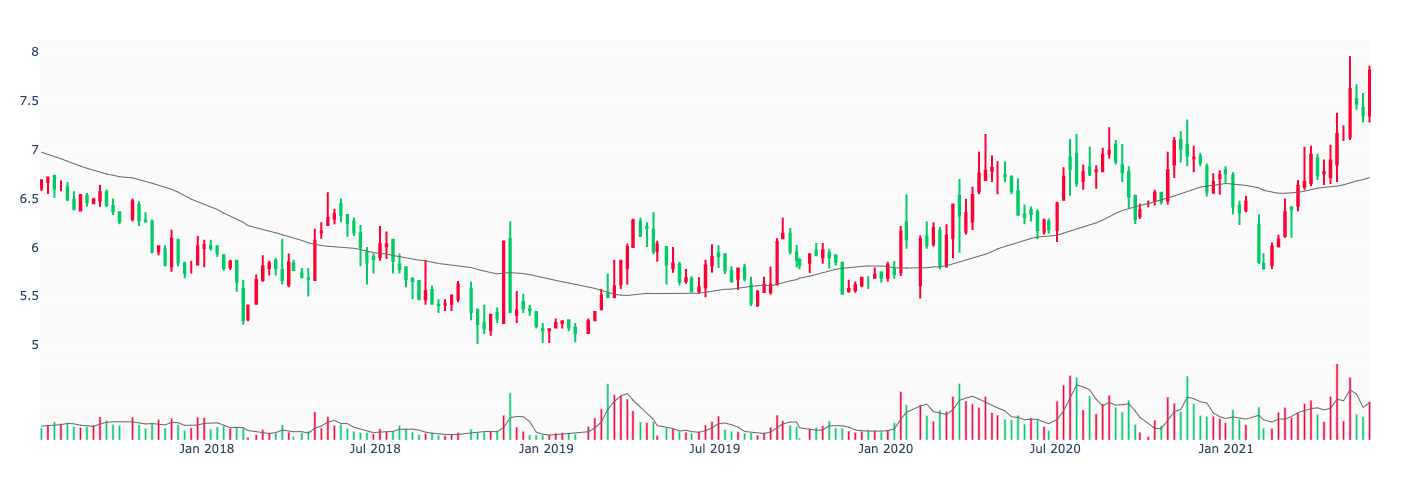

code code_name     ipoDate outDate type status
1998  sh.688139      海尔生物  2019-10-25            1      1

基本每股收益  稀释每股收益                   营业总收入                   营业总成本  \
截止日期                                                                         
2020-12-31    1.20    1.17  1,402,028,952 ( 38.5%)  1,082,247,249 ( 36.1%)   
2019-12-31    0.73    0.73  1,012,520,355 ( 20.3%)    795,263,121 (  4.4%)   
2018-12-31    0.56    0.53    841,668,642 ( 35.4%)    761,952,839 ( 33.3%)   
2017-12-31    0.35    0.34    621,407,509 ( 28.9%)    571,477,403 ( 62.8%)   
2016-12-31    0.72    0.72    481,981,608 (  nan%)    350,960,797 (  nan%)   

                   归属于母公司所有者的净利润  
截止日期                              
2020-12-31  380,954,147 (109.2%)  
2019-12-31  182,061,610 ( 59.8%)  
2018-12-31  113,957,705 ( 88.7%)  
2017-12-31   60,391,514 (-51.0%)  
2016-12-31  123,209,660 (  nan%)

营业收入         归属于母公司所有者的净利润
截止日期                                                  
2021-03-31  413,627,238 ( 55.0%)  419,839,546 (506.0%)
2020-12-31  420,575,734 ( 48.0%)  108,523,271 (122.7%)
2020-09-30  386,819,959 ( 34.7%)  117,569,830 (135.2%)
2020-06-30  327,801,764 ( 36.6%)   85,582,497 ( 56.6%)
2020-03-31  266,831,495 ( 32.7%)   69,278,549 (141.4%)
2019-12-31  284,231,095 ( 27.2%)   48,721,761 ( 23.8%)
2019-09-30  287,272,059 (  nan%)   49,990,963 (  nan%)
2019-06-30  239,995,622 (  nan%)   54,653,136 (  nan%)
2019-03-31  201,021,579 (  nan%)   28,695,750 (  nan%)
2018-12-31  223,402,916 (  nan%)   39,339,409 (  nan%)

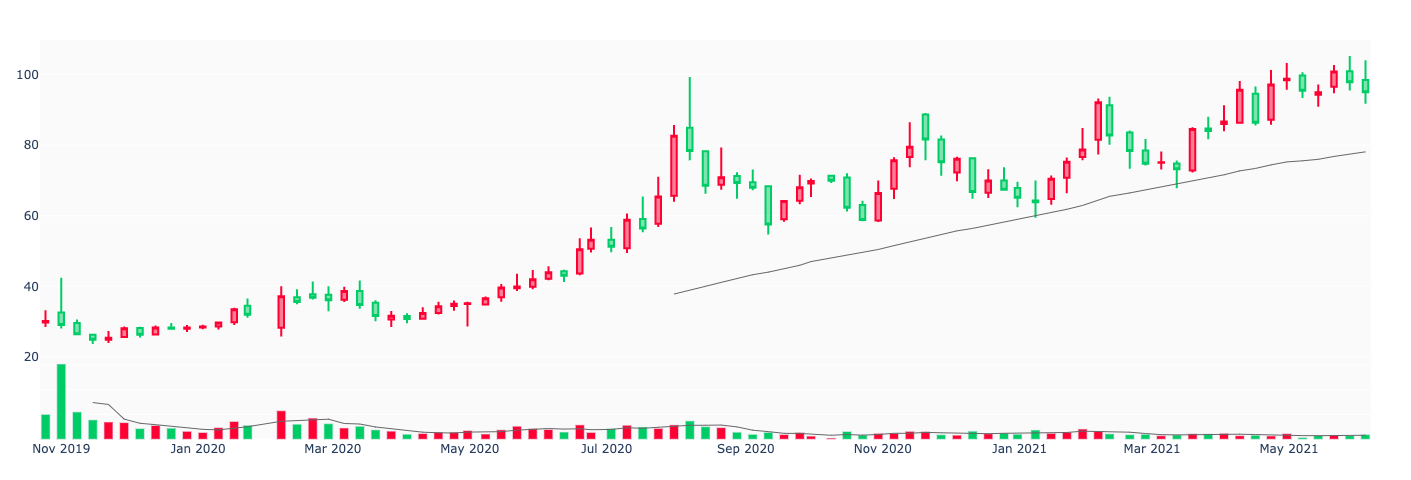

code code_name     ipoDate outDate type status
1023  sh.600882      妙可蓝多  1995-12-06            1      1

基本每股收益  稀释每股收益                   营业总收入                   营业总成本  \
截止日期                                                                         
2020-12-31   0.145   0.145  2,846,807,171 ( 63.2%)  2,757,679,456 ( 57.1%)   
2019-12-31   0.047   0.047  1,744,349,052 ( 42.3%)  1,755,081,677 ( 37.3%)   
2018-12-31   0.026   0.026  1,225,689,927 ( 24.8%)  1,277,914,449 ( 27.0%)   
2017-12-31   0.010   0.010    981,998,083 ( 92.0%)  1,006,451,039 ( 79.0%)   
2016-12-31   0.080   0.080    511,569,156 ( 41.8%)    562,124,572 (-19.1%)   

                   归属于母公司所有者的净利润  
截止日期                              
2020-12-31   59,257,984 (208.2%)  
2019-12-31   19,229,864 ( 80.7%)  
2018-12-31   10,640,622 (148.7%)  
2017-12-31    4,278,596 (-86.7%)  
2016-12-31  32,210,072 (-111.7%)

营业收入         归属于母公司所有者的净利润
截止日期                                                  
2021-03-31  950,926,005 (140.6%)   32,029,084 (215.6%)
2020-12-31  970,429,173 ( 65.7%)    6,413,271 (-13.9%)
2020-09-30  792,921,186 ( 78.3%)   20,622,624 (447.9%)
2020-06-30  688,193,408 ( 65.4%)   22,073,432 (159.0%)
2020-03-31  395,263,404 ( 32.7%)  10,148,658 (-319.1%)
2019-12-31  585,503,539 ( 28.1%)    7,447,235 (-51.6%)
2019-09-30  444,825,560 ( 46.1%)    3,763,685 (-12.7%)
2019-06-30  416,059,525 ( 51.3%)    8,523,991 (-23.1%)
2019-03-31  297,960,428 ( 57.5%)   -4,631,833 (-77.0%)
2018-12-31  457,068,931 ( 61.3%)   15,395,287 (106.2%)
2018-09-30  304,429,096 ( 14.4%)    4,310,403 (-52.1%)
2018-06-30  275,032,510 ( 17.7%)  11,078,937 (-166.2%)

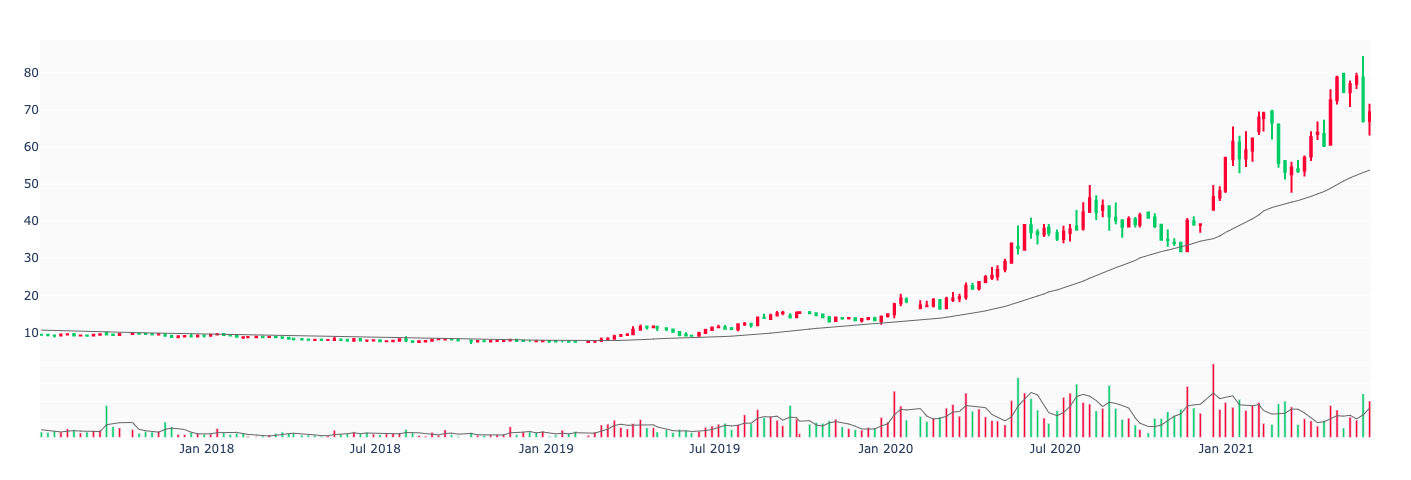

code code_name     ipoDate outDate type status
4253  sz.300529      健帆生物  2016-08-02            1      1

基本每股收益  稀释每股收益                   营业总收入                 营业总成本  \
截止日期                                                                       
2020-12-31    1.10    1.08  1,950,780,490 ( 36.2%)  957,716,232 ( 17.4%)   
2019-12-31    0.72    0.72  1,431,819,390 ( 40.9%)  816,109,780 ( 35.9%)   
2018-12-31    0.97    0.97  1,016,508,792 ( 41.5%)  600,581,154 ( 41.4%)   
2017-12-31    0.69    0.69    718,491,131 ( 32.2%)  424,742,348 ( 36.2%)   
2016-12-31    0.52    0.52    543,640,521 (  6.8%)  311,909,804 ( 12.7%)   

                   归属于母公司所有者的净利润  
截止日期                              
2020-12-31  875,240,537 ( 53.3%)  
2019-12-31  570,822,716 ( 42.0%)  
2018-12-31  401,979,957 ( 41.3%)  
2017-12-31  284,413,993 ( 40.7%)  
2016-12-31  202,118,491 (  0.8%)

营业收入         归属于母公司所有者的净利润
截止日期                                                  
2021-03-31  578,901,352 ( 52.8%)  283,305,904 ( 53.6%)
2020-12-31  635,447,620 ( 38.0%)  247,830,062 ( 62.1%)
2020-09-30  445,657,615 ( 42.6%)  186,780,990 ( 66.5%)
2020-06-30  490,793,362 ( 35.0%)  256,204,244 ( 45.4%)
2020-03-31  378,881,893 ( 28.4%)  184,425,241 ( 42.3%)
2019-12-31  460,546,998 ( 44.6%)  152,909,650 ( 59.1%)
2019-09-30  312,424,566 ( 29.2%)  112,151,433 ( 16.9%)
2019-06-30  363,678,164 ( 45.6%)  176,177,302 ( 46.8%)
2019-03-31  295,169,663 ( 42.9%)  129,584,331 ( 44.0%)
2018-12-31  318,403,961 ( 40.5%)   96,079,982 ( 18.7%)
2018-09-30  241,822,448 ( 48.1%)   95,946,708 ( 76.2%)
2018-06-30  249,727,947 ( 38.4%)  119,976,351 ( 34.2%)

code code_name     ipoDate outDate type status
3786  sz.300059      东方财富  2010-03-19            1      1

基本每股收益  稀释每股收益                   营业总收入                   营业总成本  \
截止日期                                                                         
2020-12-31  0.5788  0.5788  8,238,557,109 ( 94.7%)  3,037,001,312 ( 27.7%)   
2019-12-31  0.2313  0.2313  4,231,678,036 ( 35.5%)  2,378,564,063 (  5.2%)   
2018-12-31  0.1549  0.1549  3,123,446,007 ( 22.6%)  2,260,534,353 (  9.1%)   
2017-12-31  0.1240  0.1240  2,546,785,181 (  8.3%)  2,072,164,884 ( 21.5%)   
2016-12-31  0.1716  0.1716  2,351,818,010 (-19.6%)  1,705,238,017 ( 94.6%)   

                     归属于母公司所有者的净利润  
截止日期                                
2020-12-31  4,778,104,851 (160.9%)  
2019-12-31  1,831,288,851 ( 91.0%)  
2018-12-31    958,695,413 ( 50.5%)  
2017-12-31    636,901,644 (-10.8%)  
2016-12-31    713,768,804 (-61.4%)

营业收入           归属于母公司所有者的净利润
截止日期                                                      
2021-03-31  1,400,827,680 (115.7%)  1,910,523,644 (118.7%)
2020-12-31    940,006,557 (124.4%)  1,380,173,885 (216.0%)
2020-09-30  1,045,196,147 (173.5%)  1,589,424,307 (203.5%)
2020-06-30    617,662,803 ( 73.5%)    934,817,418 ( 92.7%)
2020-03-31    649,422,839 (102.3%)    873,689,240 (126.5%)
2019-12-31    418,969,991 ( 47.5%)    436,763,624 (176.7%)
2019-09-30    382,111,781 ( 21.8%)    523,750,548 (116.2%)
2019-06-30    355,958,909 (  3.3%)    485,011,229 ( 88.3%)
2019-03-31    321,000,343 (-12.6%)    385,763,451 ( 28.1%)
2018-12-31    284,134,617 (-17.8%)    157,822,204 (-12.0%)
2018-09-30    313,615,822 (  8.9%)    242,261,260 ( 22.7%)
2018-06-30    344,617,417 ( 43.2%)    257,565,120 ( 61.4%)

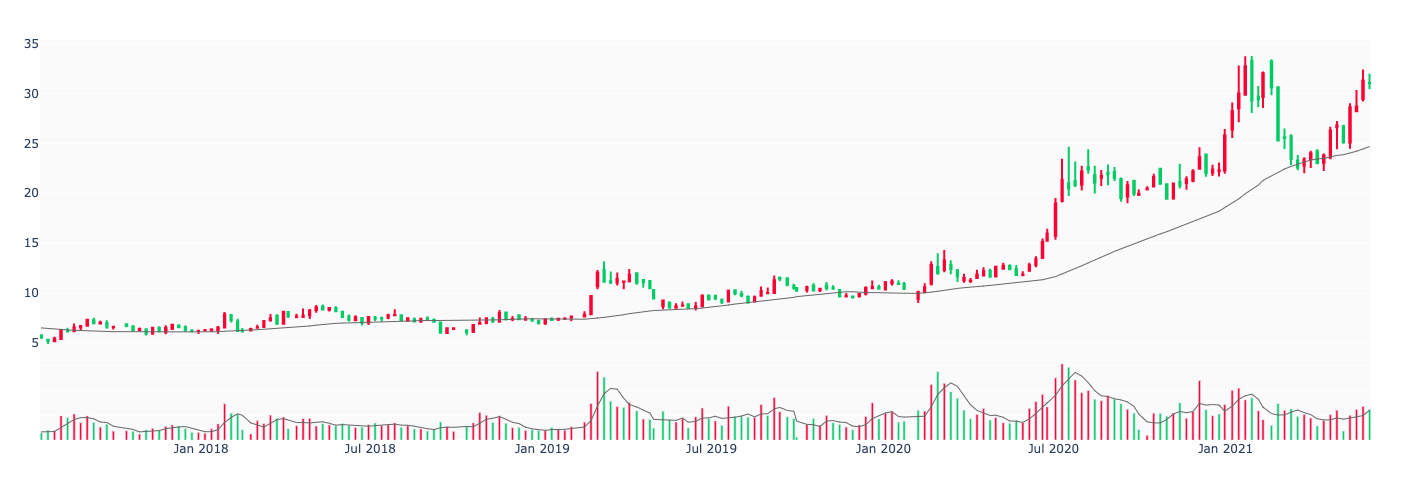

code code_name     ipoDate outDate type status
3113  sz.002402       和而泰  2010-05-11            1      1

基本每股收益  稀释每股收益                   营业总收入                   营业总成本  \
截止日期                                                                         
2020-12-31  0.4385  0.4385  4,665,677,222 ( 27.8%)  4,209,373,372 ( 28.0%)   
2019-12-31  0.3582  0.3582  3,649,383,104 ( 36.6%)  3,287,531,783 ( 36.2%)   
2018-12-31  0.2649  0.2649  2,671,111,130 ( 35.0%)  2,412,868,322 ( 33.9%)   
2017-12-31  0.2100  0.2100  1,978,567,897 ( 47.0%)  1,801,364,396 ( 47.4%)   
2016-12-31  0.1400  0.1400  1,346,098,765 ( 21.2%)  1,222,112,581 ( 17.4%)   

                   归属于母公司所有者的净利润  
截止日期                              
2020-12-31  396,017,593 ( 30.5%)  
2019-12-31  303,374,266 ( 36.7%)  
2018-12-31  221,939,592 ( 24.6%)  
2017-12-31  178,103,717 ( 48.8%)  
2016-12-31  119,660,401 ( 59.7%)

营业收入         归属于母公司所有者的净利润
截止日期                                                    
2021-03-31  1,274,848,212 ( 73.2%)  107,963,723 ( 74.6%)
2020-12-31  1,474,672,862 ( 48.3%)  119,422,352 ( 89.2%)
2020-09-30  1,362,339,804 ( 48.9%)  108,562,637 ( 54.0%)
2020-06-30  1,092,437,575 ( 12.5%)  106,195,485 ( -3.1%)
2020-03-31    736,226,981 ( -4.2%)   61,837,120 (  2.7%)
2019-12-31    994,327,537 ( 31.1%)   63,104,532 ( 69.0%)
2019-09-30    915,072,631 ( 33.6%)   70,505,117 ( 26.2%)
2019-06-30    971,393,546 ( 41.9%)  109,544,630 ( 37.2%)
2019-03-31    768,589,391 ( 41.4%)   60,219,987 ( 23.1%)
2018-12-31    758,299,019 ( 39.7%)   37,334,836 ( 21.9%)
2018-09-30    684,783,636 ( 33.5%)   55,847,821 ( 22.7%)
2018-06-30    684,458,884 ( 30.9%)   79,852,512 ( 22.7%)

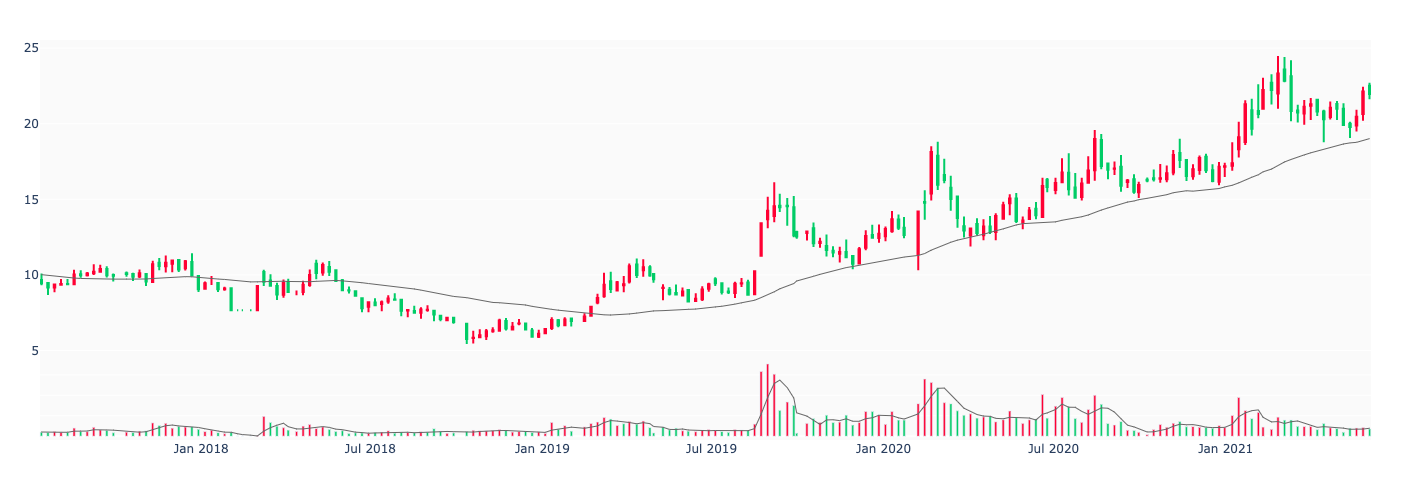

code code_name     ipoDate outDate type status
1505  sh.603345      安井食品  2017-02-22            1      1

基本每股收益  稀释每股收益                   营业总收入                   营业总成本  \
截止日期                                                                         
2020-12-31    2.61    2.54  6,965,114,987 ( 32.2%)  6,239,115,522 ( 29.2%)   
2019-12-31    1.67    1.62  5,266,663,002 ( 23.7%)  4,829,552,506 ( 22.5%)   
2018-12-31    1.25    1.24  4,259,090,161 ( 22.2%)  3,940,962,438 ( 21.3%)   
2017-12-31    0.98    0.98  3,484,010,884 ( 16.3%)  3,249,938,462 ( 16.7%)   
2016-12-31    1.09    1.09  2,996,503,422 ( 17.0%)  2,786,042,755 ( 14.9%)   

                   归属于母公司所有者的净利润  
截止日期                              
2020-12-31  603,800,311 ( 61.7%)  
2019-12-31  373,343,805 ( 38.1%)  
2018-12-31  270,256,272 ( 33.5%)  
2017-12-31  202,432,366 ( 14.1%)  
2016-12-31  177,407,096 ( 38.2%)

营业收入         归属于母公司所有者的净利润
截止日期                                                    
2021-03-31  1,883,720,874 ( 47.3%)  173,692,138 ( 97.8%)
2020-12-31  2,479,867,512 ( 39.8%)  224,683,494 ( 66.2%)
2020-09-30  1,632,547,968 ( 41.0%)  119,187,905 ( 63.3%)
2020-06-30  1,574,282,974 ( 27.0%)  172,131,096 ( 71.6%)
2020-03-31  1,278,416,533 ( 16.6%)   87,797,815 ( 35.3%)
2019-12-31  1,773,254,560 ( 34.5%)  135,158,007 ( 83.1%)
2019-09-30  1,157,889,378 ( 16.6%)   73,006,716 ( 35.0%)
2019-06-30  1,239,404,531 ( 25.1%)  100,304,182 ( 13.8%)
2019-03-31  1,096,114,533 ( 14.6%)   64,874,900 ( 19.6%)
2018-12-31  1,318,539,588 ( 26.1%)   73,810,053 ( 16.5%)
2018-09-30    993,162,994 ( 24.6%)   54,098,335 ( 52.4%)
2018-06-30    990,992,169 ( 18.4%)   88,102,597 ( 50.4%)

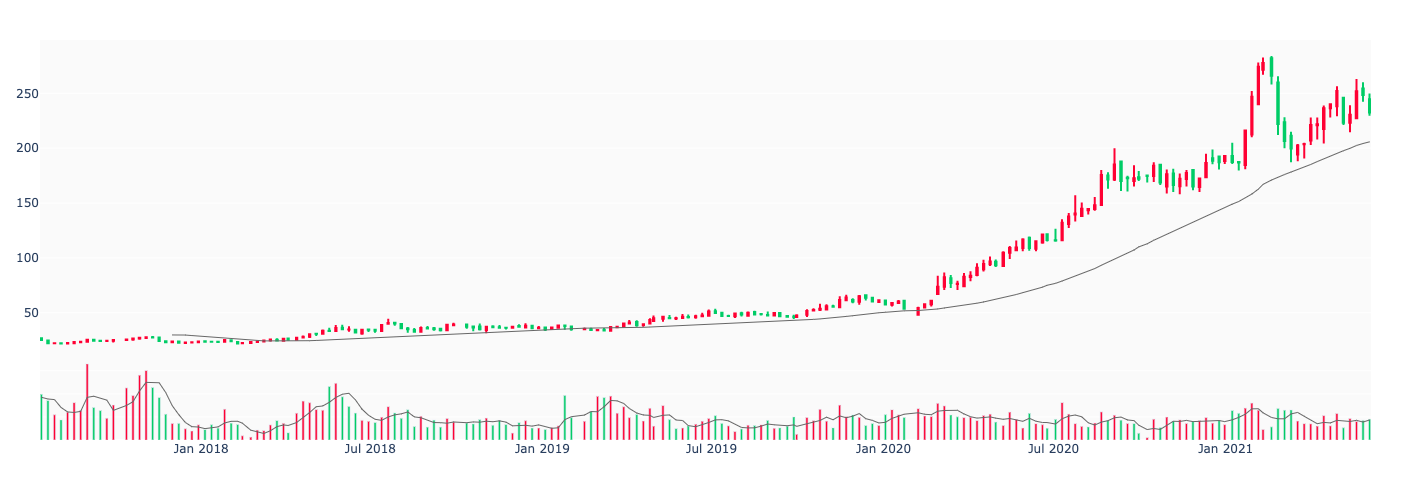

code code_name     ipoDate outDate type status
3521  sz.002821       凯莱英  2016-11-18            1      1

基本每股收益  稀释每股收益                   营业总收入                   营业总成本  \
截止日期                                                                         
2020-12-31    3.10    3.08  3,149,689,676 ( 28.0%)  2,401,646,655 ( 26.2%)   
2019-12-31    2.42    2.40  2,459,985,534 ( 34.1%)  1,903,615,235 ( 32.1%)   
2018-12-31    1.88    1.86  1,834,877,624 ( 28.9%)  1,440,970,958 ( 36.6%)   
2017-12-31    1.51    1.49  1,423,033,413 ( 29.0%)  1,054,636,568 ( 34.2%)   
2016-12-31    1.38    1.38  1,103,194,952 ( 32.8%)    785,982,947 ( 24.2%)   

                   归属于母公司所有者的净利润  
截止日期                              
2020-12-31  722,091,361 ( 30.4%)  
2019-12-31  553,863,836 ( 29.3%)  
2018-12-31  428,295,475 ( 25.5%)  
2017-12-31  341,287,654 ( 35.0%)  
2016-12-31  252,735,200 ( 64.6%)

营业收入         归属于母公司所有者的净利润
截止日期                                                    
2021-03-31    777,189,276 ( 63.4%)  154,330,480 ( 42.9%)
2020-12-31  1,066,844,114 ( 48.7%)  215,866,456 ( 15.2%)
2020-09-30    816,912,505 ( 25.8%)  190,614,990 ( 38.9%)
2020-06-30    790,436,250 ( 28.2%)  207,580,026 ( 51.2%)
2020-03-31    475,496,807 ( -0.2%)  108,029,890 ( 17.3%)
2019-12-31    717,500,386 ( 13.9%)  187,348,351 ( 11.9%)
2019-09-30    649,414,449 ( 45.2%)  137,197,108 ( 31.6%)
2019-06-30    616,576,252 ( 56.5%)  137,254,577 ( 47.3%)
2019-03-31    476,494,447 ( 31.0%)   92,063,799 ( 45.0%)
2018-12-31    629,915,038 ( 19.5%)  167,396,771 ( 19.1%)
2018-09-30    447,324,505 ( 29.9%)  104,230,872 ( 37.2%)
2018-06-30    393,981,558 ( 50.7%)   93,176,068 ( 23.1%)

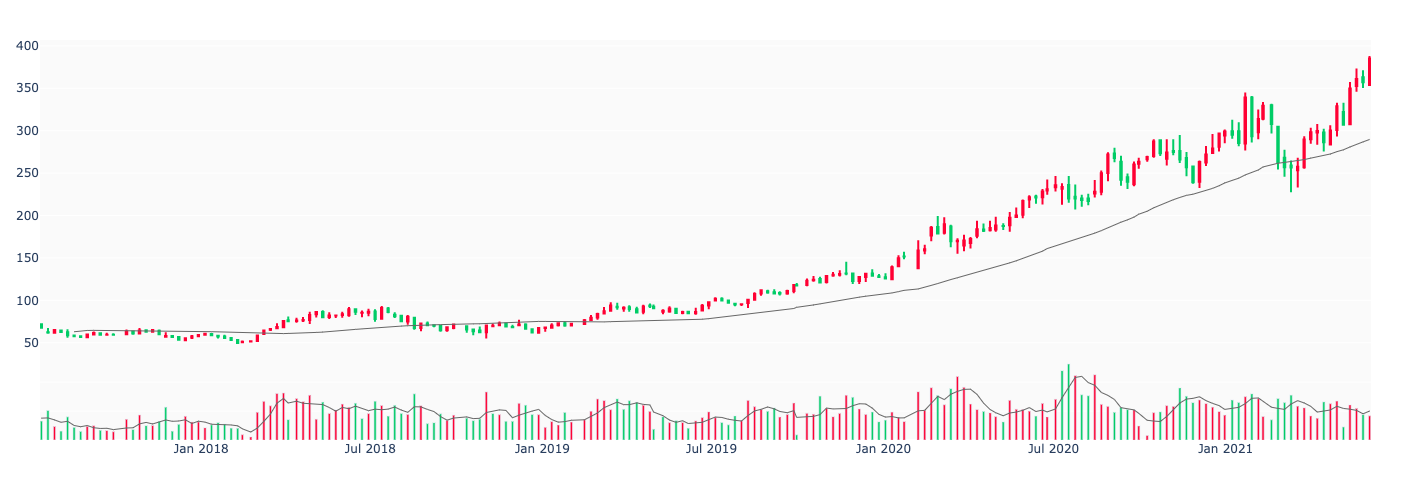

code code_name     ipoDate outDate type status
1396  sh.603127      昭衍新药  2017-08-25            1      1

基本每股收益  稀释每股收益                   营业总收入                 营业总成本  \
截止日期                                                                       
2020-12-31    1.40    1.39  1,075,904,935 ( 68.3%)  804,305,794 ( 76.5%)   
2019-12-31    0.83    0.83    639,379,338 ( 56.4%)  455,637,252 ( 52.4%)   
2018-12-31    0.67    0.67    408,798,150 ( 35.7%)  299,038,212 ( 36.7%)   
2017-12-31    0.80    0.80    301,278,958 ( 24.6%)  218,759,622 ( 16.3%)   
2016-12-31    0.84    0.84    241,805,210 ( 17.0%)  188,166,594 ( 18.0%)   

                   归属于母公司所有者的净利润  
截止日期                              
2020-12-31  315,013,896 ( 68.7%)  
2019-12-31  186,768,116 ( 72.4%)  
2018-12-31  108,338,318 ( 41.7%)  
2017-12-31   76,446,396 ( 47.9%)  
2016-12-31   51,692,494 (  5.1%)

营业收入         归属于母公司所有者的净利润
截止日期                                                  
2021-03-31  200,992,535 ( 29.9%)   93,357,265 (388.1%)
2020-12-31  444,391,650 ( 52.8%)  196,729,822 ( 93.1%)
2020-09-30  234,158,287 ( 58.7%)   42,619,280 ( 17.3%)
2020-06-30  242,641,375 ( 91.9%)   56,537,015 ( 99.2%)
2020-03-31  154,713,623 (107.9%)   19,127,780 ( 58.9%)
2019-12-31  290,924,165 ( 76.3%)  101,889,623 ( 99.3%)
2019-09-30  147,591,291 ( 35.9%)   36,346,861 (  4.5%)
2019-06-30  126,444,853 ( 51.4%)   28,385,305 (107.7%)
2019-03-31   74,419,029 ( 44.1%)   12,039,644 ( 37.3%)
2018-12-31  165,038,033 ( 25.5%)   51,115,779 ( 22.3%)
2018-09-30  108,635,876 ( 45.3%)   34,782,837 ( 54.8%)
2018-06-30   83,491,499 (  9.7%)   13,668,792 (-28.4%)

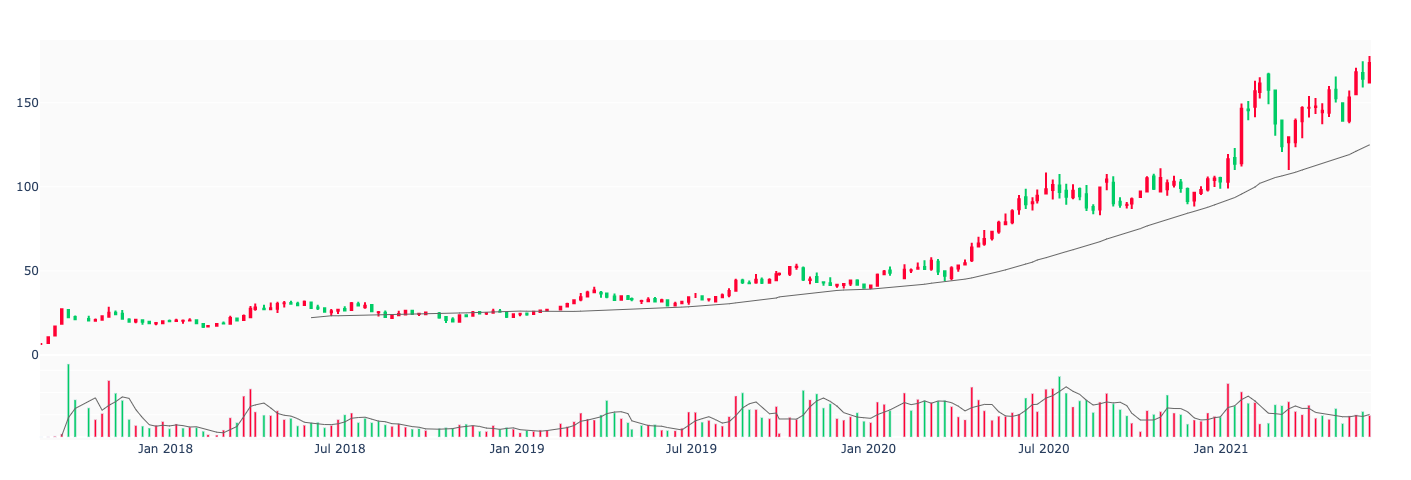

code code_name     ipoDate outDate type status
2942  sz.002230      科大讯飞  2008-05-12            1      1

基本每股收益  稀释每股收益                    营业总收入                    营业总成本  \
截止日期                                                                           
2020-12-31    0.64    0.61  13,024,657,866 ( 29.2%)  12,395,699,543 ( 28.7%)   
2019-12-31    0.40    0.38  10,078,688,920 ( 27.3%)   9,630,460,731 ( 26.2%)   
2018-12-31    0.27    0.26   7,917,221,903 ( 45.4%)   7,634,081,571 ( 50.8%)   
2017-12-31    0.22    0.21   5,444,688,147 ( 64.0%)   5,061,968,242 ( 64.2%)   
2016-12-31    0.37    0.37   3,320,476,690 ( 32.8%)   3,083,291,068 ( 37.5%)   

                     归属于母公司所有者的净利润  
截止日期                                
2020-12-31  1,363,789,617 ( 66.5%)  
2019-12-31    819,175,859 ( 51.1%)  
2018-12-31    542,066,004 ( 24.7%)  
2017-12-31    434,675,994 (-10.3%)  
2016-12-31    484,430,416 ( 13.9%)

营业收入           归属于母公司所有者的净利润
截止日期                                                      
2021-03-31  2,501,303,218 ( 77.5%)   139,470,569 (-206.1%)
2020-12-31  5,740,582,752 ( 63.8%)    809,529,598 ( 81.7%)
2020-09-30  2,934,873,824 ( 25.2%)    296,070,809 ( 60.8%)
2020-06-30  2,940,380,801 ( 29.5%)    389,634,439 (344.9%)
2020-03-31  1,408,820,489 (-28.1%)  -131,445,229 (-229.0%)
2019-12-31  3,505,585,465 ( 33.1%)    445,590,731 ( 38.0%)
2019-09-30  2,344,934,114 ( 13.1%)    184,133,066 (108.1%)
2019-06-30  2,269,801,802 ( 25.3%)     87,569,276 ( 80.1%)
2019-03-31  1,958,367,539 ( 40.1%)    101,882,786 ( 24.3%)
2018-12-31  2,633,889,876 ( 28.0%)    322,962,601 ( 21.4%)
2018-09-30  2,073,342,747 ( 61.4%)     88,500,734 ( 44.3%)
2018-06-30  1,812,215,784 ( 45.4%)     48,610,454 ( 46.0%)

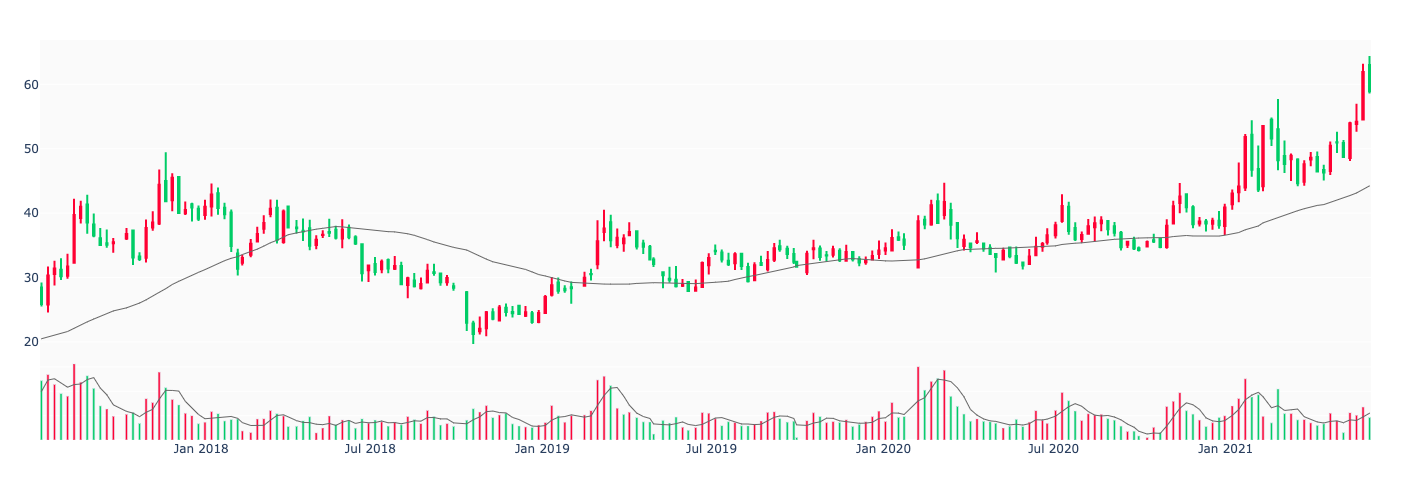

code code_name     ipoDate outDate type status
4221  sz.300496      中科创达  2015-12-10            1      1

基本每股收益  稀释每股收益                   营业总收入                   营业总成本  \
截止日期                                                                         
2020-12-31  1.0805  1.0670  2,627,883,627 ( 43.8%)  2,252,988,927 ( 36.5%)   
2019-12-31  0.5941  0.5897  1,826,858,645 ( 24.7%)  1,649,937,281 ( 20.3%)   
2018-12-31  0.4141  0.4070  1,464,583,745 ( 26.0%)  1,371,654,351 ( 21.7%)   
2017-12-31  0.1970  0.1935  1,162,327,241 ( 37.1%)  1,126,641,705 ( 47.9%)   
2016-12-31  0.3039  0.2999    847,902,182 ( 37.8%)    761,656,706 ( 50.0%)   

                   归属于母公司所有者的净利润  
截止日期                              
2020-12-31  443,461,223 ( 86.6%)  
2019-12-31  237,638,168 ( 44.6%)  
2018-12-31  164,304,281 (110.5%)  
2017-12-31   78,044,301 (-35.1%)  
2016-12-31  120,282,200 (  3.1%)

营业收入         归属于母公司所有者的净利润
截止日期                                                  
2021-03-31  790,521,307 ( 78.8%)  110,232,151 ( 64.6%)
2020-12-31  840,629,086 ( 52.1%)  151,462,112 ( 83.9%)
2020-09-30  737,692,445 ( 36.8%)  117,517,514 ( 75.2%)
2020-06-30  607,440,951 ( 51.8%)  107,513,022 (185.9%)
2020-03-31  442,121,146 ( 32.0%)   66,968,575 ( 32.4%)
2019-12-31  552,705,848 ( -2.2%)   82,360,664 ( 34.4%)
2019-09-30  539,071,446 ( 67.8%)   67,068,226 ( 59.9%)
2019-06-30  400,196,297 ( 34.7%)   37,611,235 ( 62.9%)
2019-03-31  334,885,054 ( 19.2%)   50,598,044 ( 33.3%)
2018-12-31  565,272,619 ( 22.3%)  61,288,801 (1161.3%)
2018-09-30  321,178,585 ( 38.1%)   41,953,161 (172.8%)
2018-06-30  297,076,958 ( 21.1%)   23,094,753 (-26.2%)

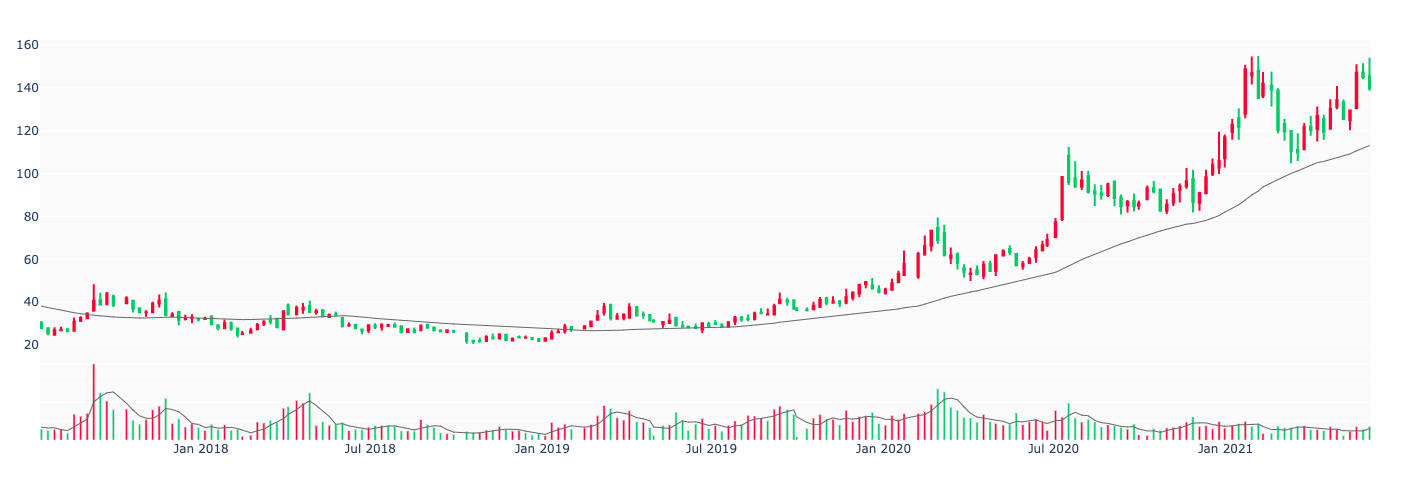

code code_name     ipoDate outDate type status
4475  sz.300760      迈瑞医疗  2018-10-16            1      1

基本每股收益  稀释每股收益                    营业总收入                    营业总成本  \
截止日期                                                                           
2020-12-31  5.4765  5.4765  21,025,846,389 ( 27.0%)  13,900,565,864 ( 22.0%)   
2019-12-31  3.8502  3.8502  16,555,991,314 ( 20.4%)  11,395,778,858 ( 16.1%)   
2018-12-31  3.3400  3.3400  13,753,357,469 ( 23.1%)   9,818,338,483 ( 15.2%)   
2017-12-31  2.3700  2.3700  11,173,795,364 ( 23.7%)   8,523,321,559 ( 12.3%)   
2016-12-31  1.6100  1.6100   9,031,723,200 ( 12.7%)   7,587,792,700 (  4.1%)   

                     归属于母公司所有者的净利润  
截止日期                                
2020-12-31  6,657,676,062 ( 42.2%)  
2019-12-31  4,680,646,750 ( 25.8%)  
2018-12-31  3,719,236,169 ( 43.6%)  
2017-12-31  2,589,154,751 ( 61.8%)  
2016-12-31  1,600,457,000 ( 75.9%)

营业收入           归属于母公司所有者的净利润
截止日期                                                      
2021-03-31  5,781,049,735 ( 21.9%)  1,715,036,341 ( 30.6%)
2020-12-31  4,962,187,750 ( 18.8%)  1,294,520,165 ( 28.2%)
2020-09-30  5,499,291,606 ( 31.8%)  1,909,527,771 ( 46.7%)
2020-06-30  5,823,100,502 ( 35.4%)  2,140,350,967 ( 57.0%)
2020-03-31  4,741,266,531 ( 21.4%)  1,313,277,159 ( 30.6%)
2019-12-31  4,176,531,994 ( 20.2%)  1,009,464,937 ( 22.7%)
2019-09-30  4,173,887,141 ( 20.2%)  1,302,091,254 ( 27.0%)
2019-06-30  4,299,646,100 ( 20.4%)  1,363,389,010 ( 28.1%)
2019-03-31  3,905,926,079 ( 20.7%)  1,005,701,549 ( 24.6%)
2018-12-31  3,473,547,584 ( 22.8%)    822,597,442 ( 38.2%)
2018-09-30  3,471,421,648 ( 21.0%)  1,024,948,414 ( 30.0%)
2018-06-30  3,572,105,369 (  nan%)  1,064,499,262 (  nan%)

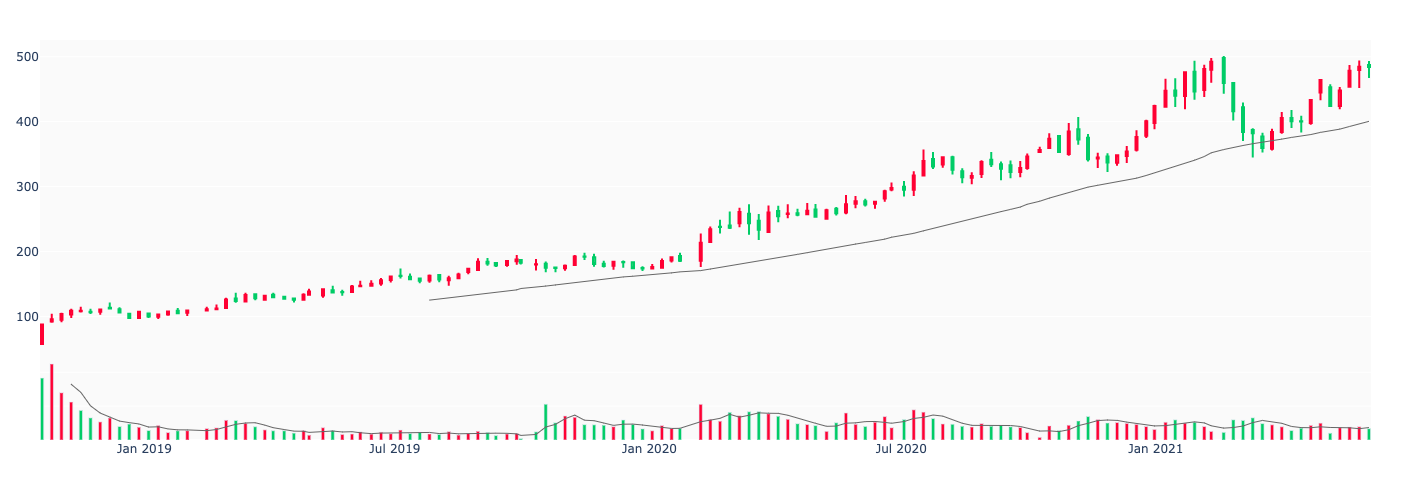

code code_name     ipoDate outDate type status
2553  sz.000799       酒鬼酒  1997-07-18            1      1

基本每股收益  稀释每股收益                   营业总收入                   营业总成本  \
截止日期                                                                         
2020-12-31  1.5130  1.5130  1,826,171,655 ( 20.8%)  1,223,666,947 ( 10.5%)   
2019-12-31  0.9217  0.9217  1,511,902,798 ( 27.4%)  1,107,118,172 ( 22.0%)   
2018-12-31  0.6853  0.6853  1,186,883,895 ( 35.1%)    907,684,473 ( 32.4%)   
2017-12-31  0.5420  0.5420    878,331,384 ( 34.1%)    685,314,392 ( 24.3%)   
2016-12-31  0.3342  0.3342    654,850,629 (  8.9%)    551,145,880 (  6.8%)   

                   归属于母公司所有者的净利润  
截止日期                              
2020-12-31  491,608,305 ( 64.1%)  
2019-12-31  299,495,663 ( 34.5%)  
2018-12-31  222,678,846 ( 26.5%)  
2017-12-31  176,098,750 ( 62.2%)  
2016-12-31  108,584,368 ( 22.6%)

营业收入         归属于母公司所有者的净利润
截止日期                                                  
2021-03-31  907,576,761 (190.4%)  267,899,693 (178.9%)
2020-12-31  699,029,852 ( 28.5%)  160,833,946 ( 39.3%)
2020-09-30  404,979,032 ( 56.4%)  146,242,291 (419.0%)
2020-06-30  409,597,108 ( 12.9%)   88,460,276 (  6.4%)
2020-03-31  312,565,663 ( -9.7%)   96,071,792 ( 32.2%)
2019-12-31  544,006,501 ( 27.5%)  115,489,892 ( 87.4%)
2019-09-30  258,992,356 (  9.5%)   28,176,866 (-39.5%)
2019-06-30  362,831,152 ( 40.5%)   83,177,329 ( 60.1%)
2019-03-31  346,072,788 ( 30.5%)   72,651,575 ( 16.2%)
2018-12-31  426,783,683 ( 30.6%)   61,634,654 (  3.3%)
2018-09-30  236,574,842 ( 30.8%)   46,569,720 ( 38.5%)
2018-06-30  258,256,160 ( 36.6%)   51,938,943 ( 13.5%)

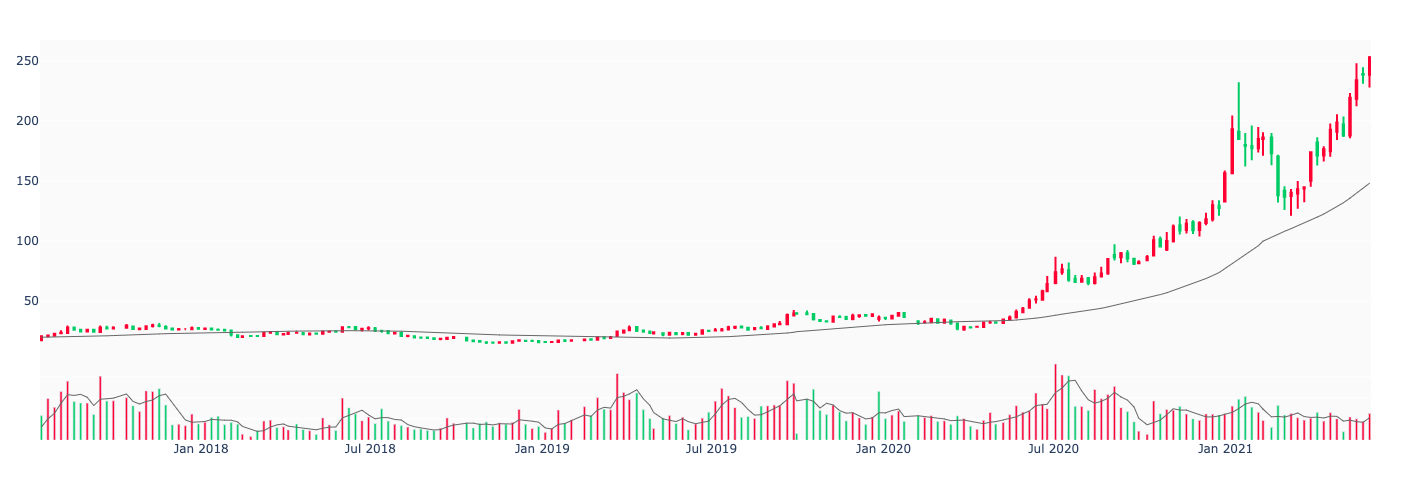

code code_name     ipoDate outDate type status
4317  sz.300595      欧普康视  2017-01-17            1      1

基本每股收益  稀释每股收益                 营业总收入                 营业总成本  \
截止日期                                                                     
2020-12-31  0.7200  0.7100  870,663,602 ( 34.6%)  448,584,255 ( 26.6%)   
2019-12-31  0.5100  0.5100  646,903,716 ( 41.1%)  354,300,958 ( 46.9%)   
2018-12-31  0.5442  0.5435  458,419,766 ( 47.1%)  241,166,947 ( 61.5%)   
2017-12-31  0.6909  0.6909  311,629,075 ( 32.6%)  149,307,838 ( 34.5%)   
2016-12-31  1.2400  1.2400  235,018,664 ( 33.4%)  110,983,804 ( 35.5%)   

                   归属于母公司所有者的净利润  
截止日期                              
2020-12-31  433,320,973 ( 41.2%)  
2019-12-31  306,889,255 ( 41.9%)  
2018-12-31  216,243,022 ( 43.3%)  
2017-12-31  150,858,704 ( 32.3%)  
2016-12-31  114,037,966 ( 28.6%)

营业收入         归属于母公司所有者的净利润
截止日期                                                  
2021-03-31  286,936,799 (176.0%)  138,104,772 (263.7%)
2020-12-31  264,066,882 ( 63.1%)  155,819,864 (101.0%)
2020-09-30  309,559,318 ( 39.1%)  149,577,242 ( 32.7%)
2020-06-30  193,070,034 ( 36.5%)   89,951,609 ( 36.1%)
2020-03-31  103,967,367 (-14.1%)   37,972,257 (-24.8%)
2019-12-31  161,914,499 ( 26.2%)   77,533,616 ( 52.7%)
2019-09-30  222,512,172 ( 42.3%)  112,738,234 ( 37.4%)
2019-06-30  141,429,936 ( 46.5%)   66,114,374 ( 38.2%)
2019-03-31  121,047,110 ( 56.7%)   50,503,032 ( 41.8%)
2018-12-31  128,261,543 ( 43.7%)   50,759,739 ( 33.3%)
2018-09-30  156,422,376 ( 52.1%)   82,033,910 ( 51.0%)
2018-06-30   96,507,234 ( 56.7%)   47,830,610 ( 52.0%)

code code_name     ipoDate outDate type status
4467  sz.300751      迈为股份  2018-11-09            1      1

基本每股收益  稀释每股收益                   营业总收入                   营业总成本  \
截止日期                                                                         
2020-12-31    7.58    7.46  2,285,442,724 ( 59.0%)  1,914,892,068 ( 58.0%)   
2019-12-31    4.76    4.74  1,437,708,963 ( 82.5%)  1,211,861,828 ( 98.0%)   
2018-12-31    4.26    4.26    787,861,352 ( 65.5%)    612,114,241 ( 72.7%)   
2017-12-31    3.36    3.36    475,919,327 ( 37.8%)    354,449,110 ( 44.0%)   
2016-12-31     NaN     NaN    345,295,400 (232.5%)    246,059,800 (209.6%)   

                   归属于母公司所有者的净利润  
截止日期                              
2020-12-31  394,433,569 ( 59.3%)  
2019-12-31  247,542,923 ( 44.8%)  
2018-12-31  170,927,560 ( 30.6%)  
2017-12-31  130,895,322 ( 22.3%)  
2016-12-31  107,029,000 (366.8%)

营业收入         归属于母公司所有者的净利润
截止日期                                                  
2021-03-31  631,576,180 ( 54.6%)  120,068,899 ( 85.1%)
2020-12-31  670,873,126 ( 61.4%)  120,060,332 ( 87.6%)
2020-09-30  676,586,803 ( 68.8%)   85,100,001 ( 42.6%)
2020-06-30  529,415,032 ( 62.7%)  124,396,621 (106.2%)
2020-03-31  408,567,763 ( 38.2%)   64,876,615 (  2.1%)
2019-12-31  415,775,352 (100.5%)   63,981,742 (111.7%)
2019-09-30  400,861,927 ( 79.0%)   59,668,495 ( 16.6%)
2019-06-30  325,408,115 ( 91.5%)   60,340,816 ( 53.5%)
2019-03-31  295,663,570 ( 58.4%)   63,551,870 ( 26.5%)
2018-12-31  207,405,018 ( 90.0%)   30,228,975 ( 27.5%)
2018-09-30  223,934,077 (  nan%)   51,180,976 (  nan%)
2018-06-30  169,887,877 (  nan%)   39,297,804 (  nan%)

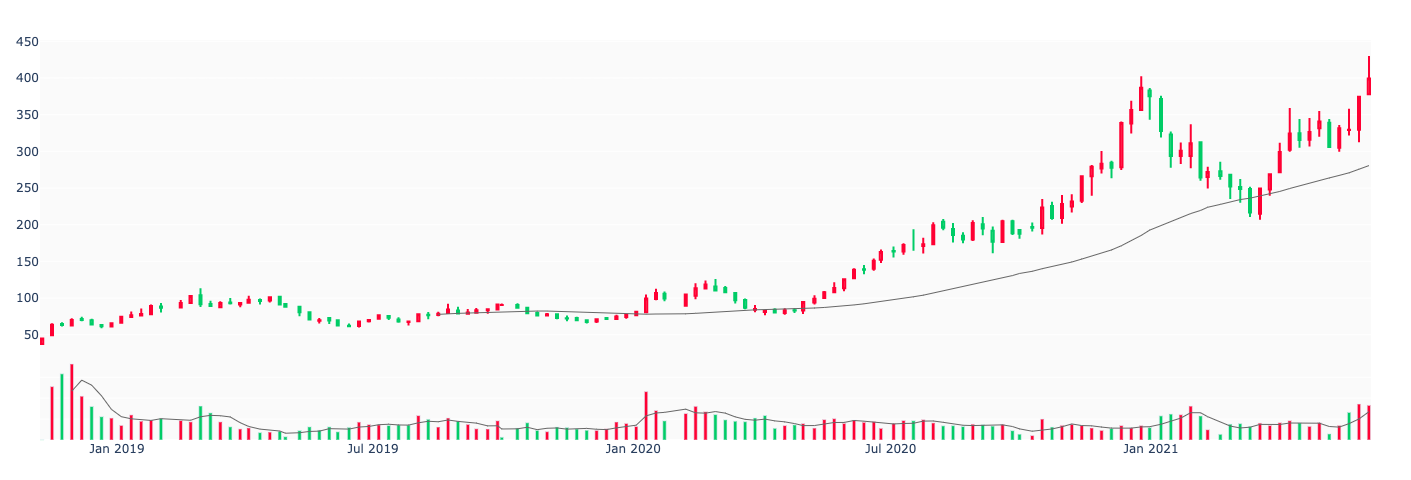

code code_name     ipoDate outDate type status
4474  sz.300759      康龙化成  2019-01-28            1      1

基本每股收益  稀释每股收益                   营业总收入                   营业总成本  \
截止日期                                                                         
2020-12-31  1.4825  1.4781  5,133,596,759 ( 36.6%)  4,176,570,469 ( 32.3%)   
2019-12-31  0.8284  0.8282  3,757,160,087 ( 29.2%)  3,157,685,516 ( 25.4%)   
2018-12-31  0.5638  0.5638  2,908,123,034 ( 26.8%)  2,517,582,113 ( 24.0%)   
2017-12-31  0.3900  0.3900  2,294,118,067 ( 40.4%)  2,030,132,959 ( 40.6%)   
2016-12-31  0.3500  0.3500  1,634,238,680 ( 44.9%)  1,443,644,895 ( 36.9%)   

                     归属于母公司所有者的净利润  
截止日期                                
2020-12-31  1,172,382,388 (114.3%)  
2019-12-31    547,191,487 ( 64.3%)  
2018-12-31    333,044,274 ( 44.3%)  
2017-12-31    230,857,088 ( 30.5%)  
2016-12-31    176,911,925 (139.6%)

营业收入         归属于母公司所有者的净利润
截止日期                                                    
2021-03-31  1,489,385,310 ( 55.3%)  245,874,010 (142.2%)
2020-12-31  1,547,628,754 ( 36.9%)  383,339,302 ( 75.2%)
2020-09-30  1,392,801,370 ( 40.7%)  310,082,933 ( 85.6%)
2020-06-30  1,233,983,131 ( 41.3%)  377,442,091 (252.5%)
2020-03-31    959,183,503 ( 25.7%)  101,518,062 ( 87.2%)
2019-12-31  1,130,673,466 ( 29.6%)  218,811,149 (101.7%)
2019-09-30    989,973,546 ( 29.4%)  167,056,321 ( 54.6%)
2019-06-30    873,195,759 ( 26.8%)  107,081,914 ( 41.6%)
2019-03-31    763,317,315 ( 31.1%)   54,242,102 ( 32.9%)
2018-12-31    872,619,758 (  nan%)  108,508,251 (  nan%)
2018-09-30    764,930,412 (  nan%)  108,062,629 (  nan%)
2018-06-30    688,422,957 (  nan%)   75,648,421 (  nan%)

code code_name     ipoDate outDate type status
1683  sh.603737       三棵树  2016-06-03            1      1

基本每股收益  稀释每股收益                   营业总收入                   营业总成本  \
截止日期                                                                         
2020-12-31    1.91    1.91  8,200,228,400 ( 37.3%)  7,552,768,977 ( 38.8%)   
2019-12-31    1.56    1.56  5,972,263,436 ( 66.6%)  5,440,472,939 ( 64.0%)   
2018-12-31    1.19    1.19  3,584,016,774 ( 36.8%)  3,316,939,758 ( 36.3%)   
2017-12-31    1.35    1.35  2,619,460,163 ( 34.5%)  2,433,059,529 ( 34.7%)   
2016-12-31    1.49    1.49  1,948,210,366 ( 28.3%)  1,806,638,980 ( 29.8%)   

                   归属于母公司所有者的净利润  
截止日期                              
2020-12-31  501,772,705 ( 23.5%)  
2019-12-31  406,143,739 ( 82.5%)  
2018-12-31  222,488,029 ( 26.4%)  
2017-12-31  175,974,586 ( 31.7%)  
2016-12-31  133,658,233 ( 15.7%)

营业收入           归属于母公司所有者的净利润
截止日期                                                      
2021-03-31  1,483,058,232 (241.2%)     8,067,029 (-106.4%)
2020-12-31  3,204,735,398 ( 50.2%)    176,866,210 ( 32.1%)
2020-09-30  2,400,985,330 ( 46.7%)    216,150,975 ( 40.0%)
2020-06-30  2,159,845,976 ( 37.4%)    235,139,532 ( 96.2%)
2020-03-31    434,661,695 (-31.1%)  -126,384,012 (6484.2%)
2019-12-31  2,133,303,921 ( 66.0%)    133,842,387 ( 43.4%)
2019-09-30  1,636,720,239 ( 68.2%)    154,388,286 (120.2%)
2019-06-30  1,571,394,693 ( 67.8%)    119,832,576 ( 79.2%)
2019-03-31    630,844,583 ( 62.2%)     -1,919,509 (-75.4%)
2018-12-31  1,285,199,871 ( 42.5%)     93,315,293 (  8.6%)
2018-09-30    973,280,496 ( 37.0%)     70,116,097 ( 41.1%)
2018-06-30    936,663,683 ( 39.4%)     66,860,981 ( 25.7%)

<function baostock.login.loginout.logout(user_id='anonymous')>

In [3]:
bs.login

batch_size = 100
# for i in range(batch_size):
i = 0
for s in stock:    
    i = i + print_information(s)
    time.sleep(1)
    if i == batch_size:
        print("pause")
        break
    
bs.logout